In [1]:
import os
import sys

import matplotlib.pyplot as plt
from utils import add_path, save_in

add_path()

from model import (
    SocietyConstantsEnergyPrices,
    GovernmentMixedStrategy,
    GovernmentBuildChargingStation,
    GovernmentProvidesSubsidies,
    GovernmentNoSubsidies,
    CV,
    EV,
    PHEV,
    Car_EV,
)
from model.utils import (
    get_trajectories,
    common_params,
    plot_intervals,
    check_by,
    plot_check_by,
)
from common import MC, T


In [2]:
N = common_params["kwargs"]["population"]

param = "government"
title = "Results by different Government strategies."
param_list = [
    GovernmentBuildChargingStation(),
    GovernmentMixedStrategy(),
    GovernmentProvidesSubsidies(),
    GovernmentNoSubsidies()
]
name = "main_by_gov.png"

In [3]:
common_params["kwargs"]

{'alpha': 0.01,
 'car_price_noise': <function model.utils.common_params.<lambda>()>,
 'city_size': (17, 17),
 'corporation_margin': 0.2,
 'corporation_technological_progress': 0.004,
 'energy_price': 500,
 'energy_factor': 0.8,
 'fuel_price': 6,
 'government': <model.Government.GovernmentBuildChargingStation at 0x7f7a31f29010>,
 'initial_public_chargers': 1,
 'initial_time': (2015, 1),
 'nerby_radius': 1,
 'population': 3000}

In [4]:
values = check_by(
    SocietyConstantsEnergyPrices,
    common_params["kwargs"],
    param,
    param_list,
    T,
    MC,
    4,
)

100%|██████████| 4/4 [00:04<00:00,  1.11s/it]


saved as: ['/home/chwilko/Documents/studia/pwr/praca/magisterka', 'pictures', 'main_by_gov.png']


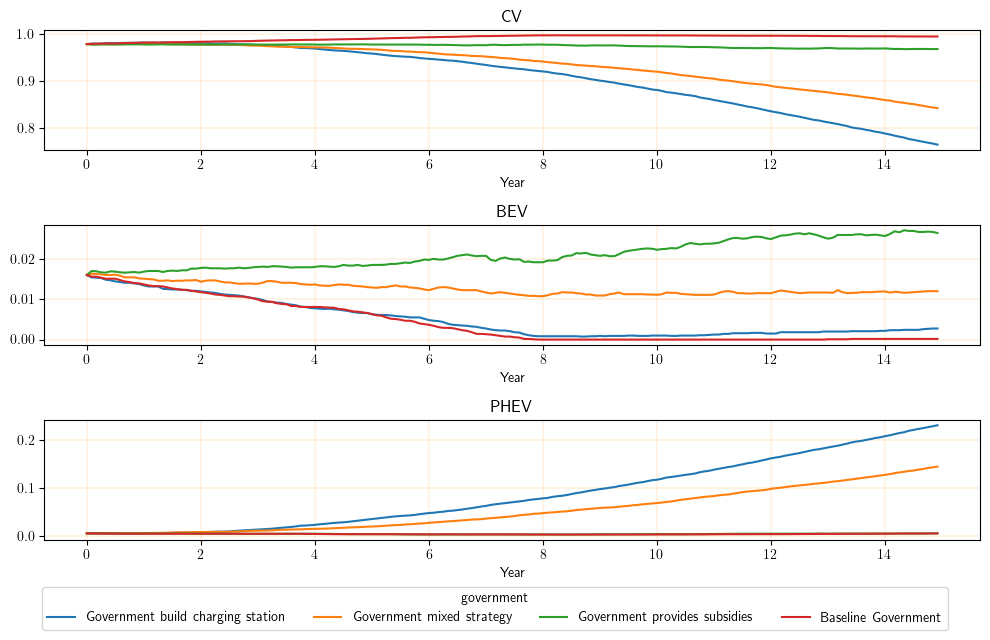

In [9]:
fig, axs = plt.subplots(nrows=3, figsize=(10, 6))
plot_check_by(values, axs)

# fig.suptitle(title, fontsize=16, y=1)

for ax in axs:
    ax.set_xlabel("Year")
    ax.grid()

axs[0].set_title(CV)
axs[1].set_title(EV)
axs[2].set_title(PHEV)
fig.tight_layout()
fig.legend(
    [
        "Government build charging station",
        "Government mixed strategy",
        "Government provides subsidies",
        "Baseline Government "
    ],
    title=param.replace("_", " "),
    loc="lower center",
    bbox_to_anchor=(1/2, -0.07),
    ncol=len(param),
)

save_in(name)
